# Inner Core Lightning Burst Analysis with Intensification Categories
This notebook analyzes inner core lightning data in relation to tropical cyclone intensification categories. It includes statistical tests and visualizations to understand distribution patterns across different detection methods.

This notebook includes the following sections:
- [Statistical Analysis - All Lightning Data](#statistical-analysis---all-lightning-data)
- [Statistical Analysis - Basin](#statistical-analysis---basin)
- [Statistical Analysis - Current Category](#statistical-analysis---current-category)
- [Statistical Analysis - Grouped Category](#statistical-analysis---grouped-category)

## Code Requirements
This notebook requires the following files from [analysis_data](../analysis_data/):
- [innercore_bursts.csv](../analysis_data/innercore_bursts.csv)

This notebook requires the following libraries not built-in to Python:
- matplotlib
- numpy
- pandas
- polars
- scipy
- seaborn

## Code
Start by importing the required libraries and data files.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# Import Data
burst_data = pd.read_csv('../analysis_data/innercore_bursts.csv')

### Statistical Analysis - All Lightning Data
The following section analyzes the relationship between lightning burst and intensification stages with all lightning data.

In [3]:
# Group all lightning data by intensification category
burst_counts = burst_data.groupby('Intensification_Category_3')[['burst_iqr1','burst_iqr2','burst_logn1']].sum()

burst_counts = burst_counts.reset_index()
print(burst_counts)

  Intensification_Category_3  burst_iqr1  burst_iqr2  burst_logn1
0               Intensifying         350         103          415
1                    Neutral         171          47          256
2               Unidentified         149          50          159
3                  Weakening         175          50          222


We focus on the IQR1, IQR2, and LOGN1 methods for this analysis. We determined the MAD method to be too volatile, and the LOGN2 method to set the threshold consistently too high.

Use chi-squared tests to examine whether the number of bursts detected by each method is significantly different across each of the intensification stages.

In [4]:
# See if bursts statistically significant differences for each intensification
methods = ['burst_iqr1', 'burst_iqr2', 'burst_logn1']

results = {}
for method in methods:
    observed = burst_counts[method].tolist()  # Get counts for the method across all stages
    chi2, p = stats.chisquare(observed)
    results[method] = {'Chi²': chi2, 'p-value': p}

for method in results:
    print(f"{method}: χ² = {results[method]['Chi²']:.2f}, p = {results[method]['p-value']:.4f}")

burst_iqr1: χ² = 123.36, p = 0.0000
burst_iqr2: χ² = 35.09, p = 0.0000
burst_logn1: χ² = 135.55, p = 0.0000


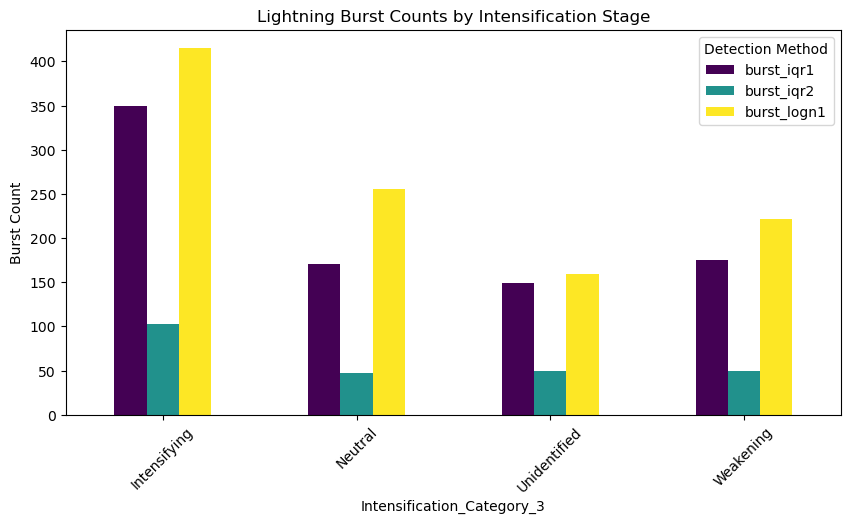

In [5]:
# Plot burst counts by intensification category and method
burst_counts.set_index("Intensification_Category_3").plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.ylabel("Burst Count")
plt.title("Lightning Burst Counts by Intensification Stage")
plt.legend(title="Detection Method")
plt.xticks(rotation=45)
plt.show()

Let's take a look at the proportional distribution of bursts by intensification stage for the three methods.

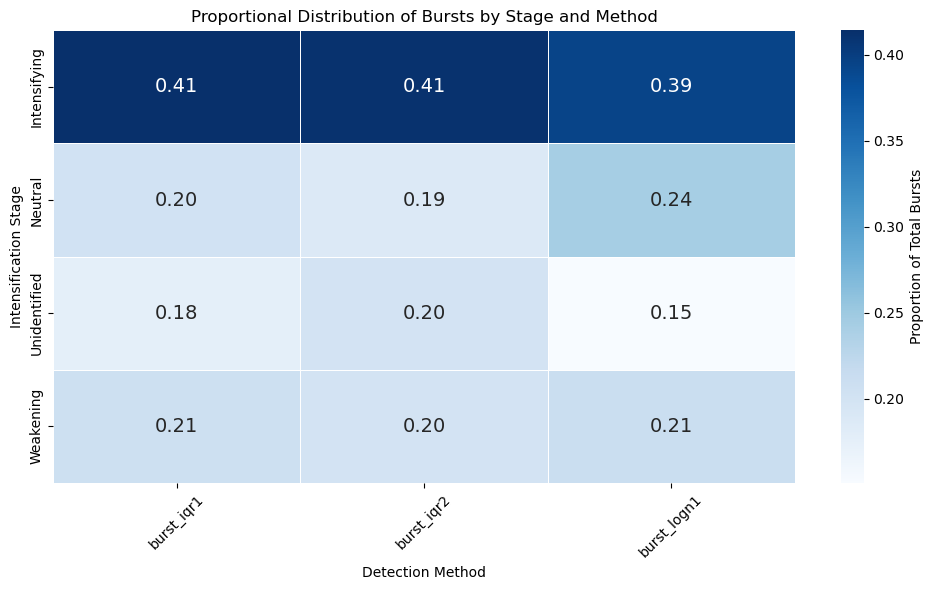

In [6]:
# Normalize data to show proportions within each method
df_normalized = burst_counts.set_index('Intensification_Category_3').apply(lambda x: x/x.sum(), axis=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(df_normalized,
            annot=True,
            fmt=".2f",
            cmap='Blues',
            linewidths=0.5,
            cbar_kws={'label': 'Proportion of Total Bursts'},
            annot_kws={"size": 14})
plt.title('Proportional Distribution of Bursts by Stage and Method')
plt.xlabel('Detection Method')
plt.ylabel('Intensification Stage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Findings

- All detection methods show significant overall differences (p < 0.05), suggesting distinct lightning burst patterns across tropical cyclone life cycles
- Proportional distribution heatmap reveals more lightning bursts detected at Intensifying stage compared to other stages


### Statistical Analysis - Basin
The following section will investigate basin-level patterns in lightning burst distribution across tropical cyclone intensification stages. Start by performing the chi-squared test for each basin and method combination.

In [7]:
# Define the burst detection methods to analyze
methods = ['burst_iqr1', 'burst_iqr2', 'burst_logn1']

# Group data by Basin and Intensification Stage, summing up burst counts
basin_df = burst_data.groupby(["basin", "Intensification_Category_3"])[methods].sum().reset_index()

# Initialize a list to collect all test results
all_results = []

# Perform Chi-Square test for each Basin
for basin in basin_df["basin"].unique():
    # Filter data for the current basin and set category as index
    basin_data = basin_df[basin_df["basin"] == basin].set_index("Intensification_Category_3")

    # Check if there are observations to test
    if basin_data.empty:
        print(f"No data available for {basin} Basin.")
        continue

    # Run Chi-Square test for each method
    for method in methods:
        observed = basin_data[method].tolist()

        # Ensure there are observed values to avoid division by zero in chi-square
        if sum(observed) == 0:
            print(f"Skipping {method} for {basin} due to zero observations.")
            continue

        # Perform Chi-Square test
        chi2, p = stats.chisquare(observed)

        # Append results to the list
        all_results.append({
            "Basin": basin,
            "Method": method,
            "p-value": p
        })

results_df = pd.DataFrame(all_results)
results_df['Significant'] = results_df['p-value'] <= 0.05
print(results_df)

Skipping burst_iqr2 for CPAC due to zero observations.
   Basin       Method       p-value  Significant
0    ATL   burst_iqr1  4.653807e-08         True
1    ATL   burst_iqr2  3.314733e-01        False
2    ATL  burst_logn1  4.705278e-11         True
3   CPAC   burst_iqr1  2.737148e-01        False
4   CPAC  burst_logn1  1.366585e-01        False
5   EPAC   burst_iqr1  2.305469e-01        False
6   EPAC   burst_iqr2  3.207164e-02         True
7   EPAC  burst_logn1  3.382379e-03         True
8     IO   burst_iqr1  9.991685e-03         True
9     IO   burst_iqr2  2.262166e-03         True
10    IO  burst_logn1  2.505351e-03         True
11  SHEM   burst_iqr1  2.015049e-04         True
12  SHEM   burst_iqr2  8.234218e-03         True
13  SHEM  burst_logn1  1.470951e-04         True
14  WPAC   burst_iqr1  6.504405e-25         True
15  WPAC   burst_iqr2  1.851081e-05         True
16  WPAC  burst_logn1  5.474354e-26         True


We see that most of the basin/method combinations have statistically significant results for the chi-squared tests. The basin/method combinations with a statisically insignificant result are ATL IQR2, CPAC IQR1, CPAC LOGN1, and EPAC IQR1. Note that CPAC does not have any detected bursts for the IQR2 method, as the CPAC data is relatively sparse.

Let's plot the burst proportion distributions for each basin. We create a function to streamline this process.

In [8]:
def create_basin_heatmap(basin):
    # Filter data for specific category
    basin_data = basin_df[basin_df['basin'] == basin]

    # Melt the data to long format
    melted = basin_data.melt(
        id_vars=['Intensification_Category_3'],
        value_vars=methods,
        var_name='Method',
        value_name='Burst_Count'
    )

    # Pivot and normalize data
    pivot_table = melted.pivot_table(
        index='Intensification_Category_3',
        columns='Method',
        values='Burst_Count',
        aggfunc='sum'
    )

    # Normalize within each method
    df_normalized = pivot_table.apply(lambda x: x/x.sum(), axis=0)

    # Create heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        df_normalized,
        annot=True,
        fmt=".2f",
        cmap='Blues',
        linewidths=0.5,
        cbar_kws={'label': 'Proportion of Total Bursts'},
        vmin=0,
        vmax=1,
        annot_kws={"size": 14}
    )
    plt.title(f'{basin} Basin - Burst Distribution')
    plt.xlabel('Detection Method')
    plt.ylabel('Intensification Stage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

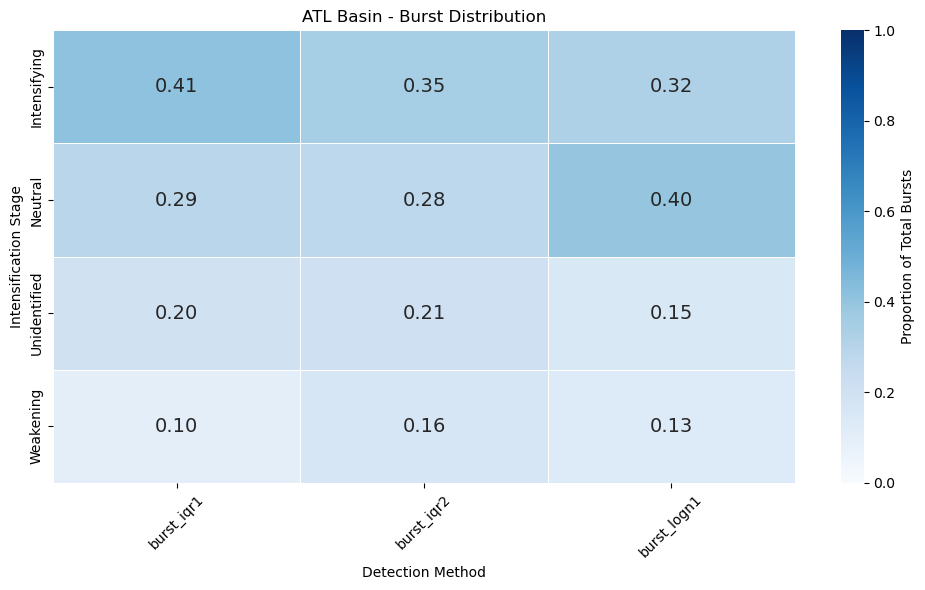

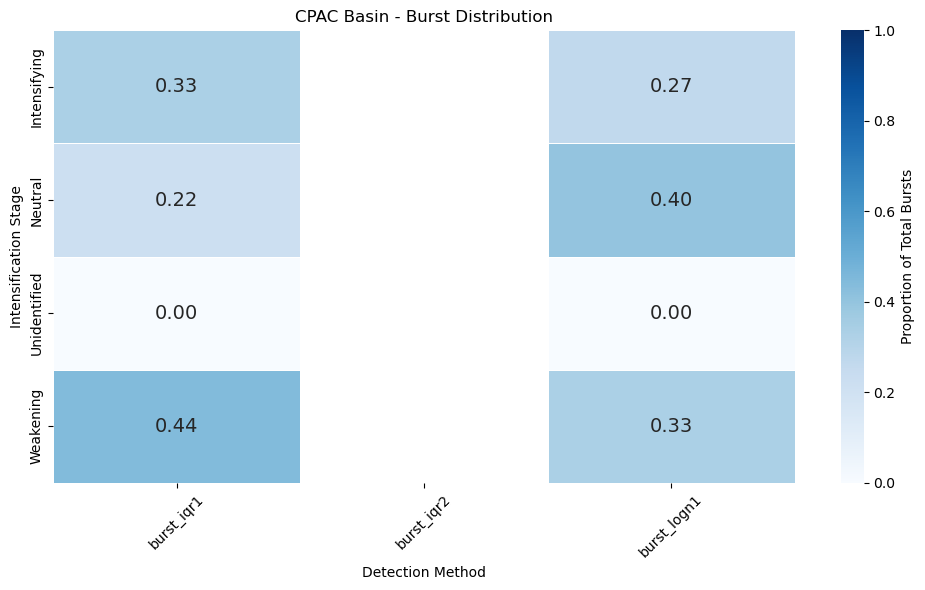

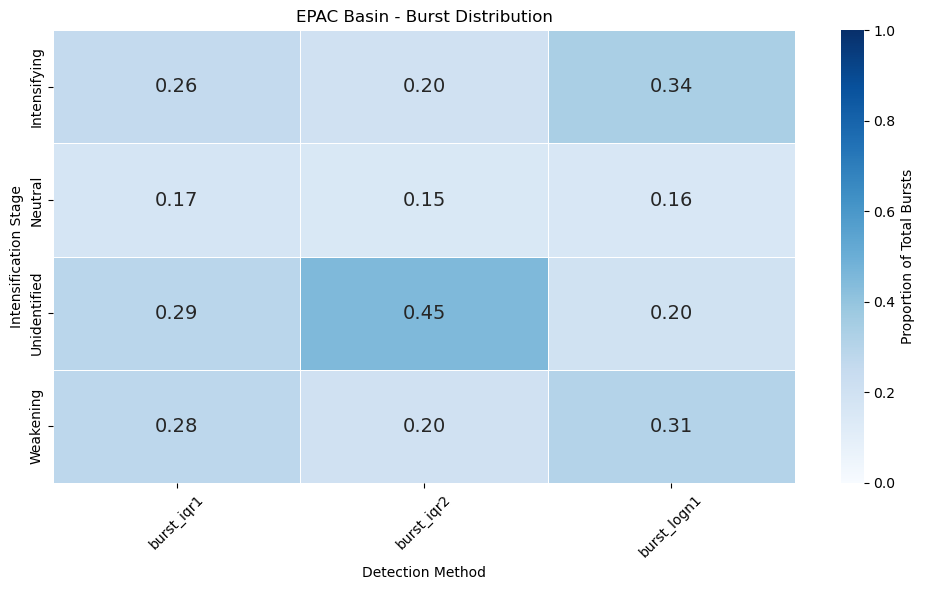

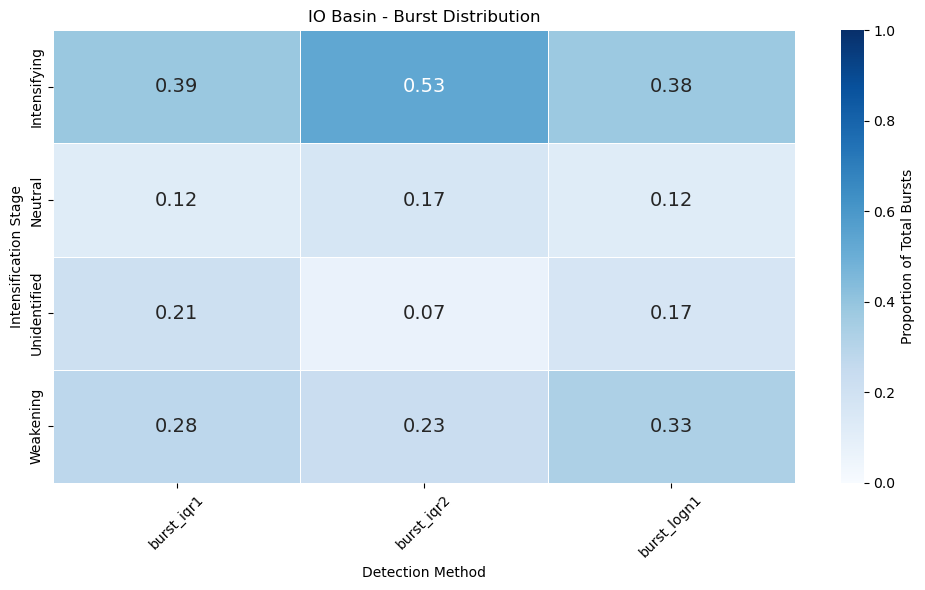

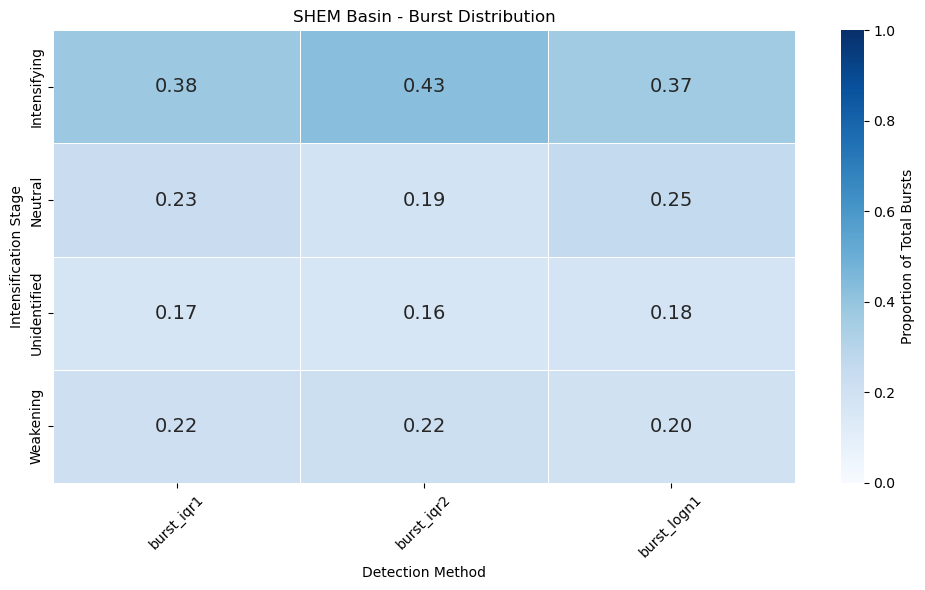

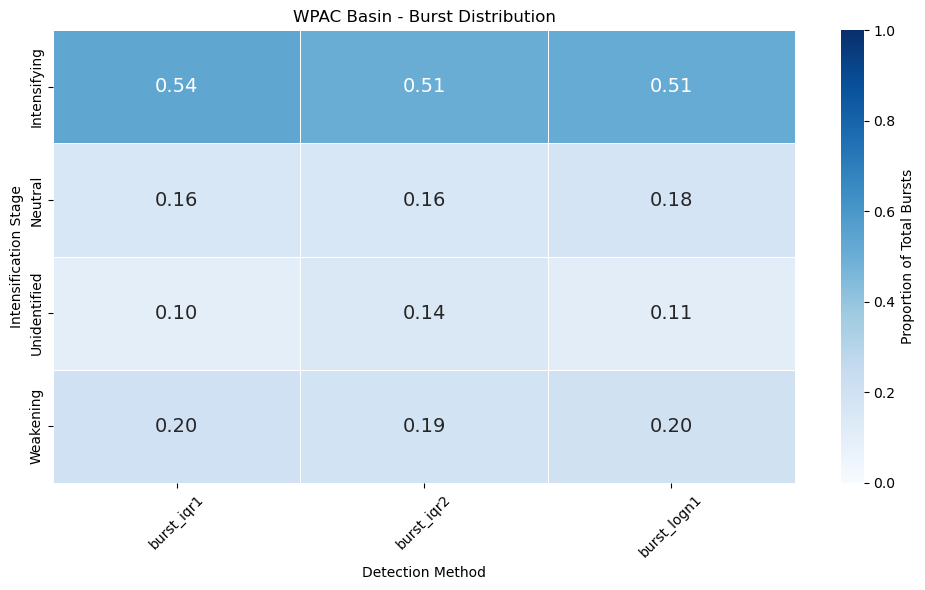

In [9]:
# Generate heatmaps
create_basin_heatmap("ATL")
create_basin_heatmap("CPAC")
create_basin_heatmap("EPAC")
create_basin_heatmap("IO")
create_basin_heatmap("SHEM")
create_basin_heatmap("WPAC")

Key Findings

- Most detection methods show significant overall differences (p < 0.05) on basin level except CPAC
- Proportional distribution heatmap reveals most basin shows more lightning burst detected at the Intensifying stage except CPAC and EPAC


### Statistical Analysis - Current Category
The following section analyzes the lightning burst pattern in each current category (0-5). Note that current category does not refer to the TC's category - rather, this refers to the category at the time of each lightning stroke during the storm. We use the [Saffir-Simpson scale](../README.md#background-information) and define category 0 as wind speeds between 40-64 knots.

Start by performing the chi-squared test for the current categories and threshold methods.

In [10]:
# Define the burst detection methods to analyze
methods = ['burst_iqr1', 'burst_iqr2', 'burst_logn1']

# Group data by Category and Intensification Stage, summing up burst counts
cat_df = burst_data.groupby(["Current_Category", "Intensification_Category_3"])[methods].sum().reset_index()

# Initialize a list to collect all test results
all_results = []

# Perform Chi-Square test for each Category
for cat in cat_df["Current_Category"].unique():
    # Filter data for the current basin and set category as index
    cat_data = cat_df[cat_df["Current_Category"] == cat].set_index("Intensification_Category_3")

    # Check if there are observations to test
    if cat_data.empty:
        print(f"No data available for {cat}.")
        continue

    # Run Chi-Square test for each method
    for method in methods:
        observed = cat_data[method].tolist()

        # Ensure there are observed values to avoid division by zero in chi-square
        if sum(observed) == 0:
            print(f"Skipping {method} for {cat} due to zero observations.")
            continue

        # Perform Chi-Square test
        chi2, p = stats.chisquare(observed)

        # Append results to the list
        all_results.append({
            "Category": cat,
            "Method": method,
            "p-value": p
        })

results_df2 = pd.DataFrame(all_results)
results_df2['Significant'] = results_df2['p-value'] <= 0.05
print(results_df2)

    Category       Method       p-value  Significant
0          0   burst_iqr1  2.960853e-45         True
1          0   burst_iqr2  9.884759e-17         True
2          0  burst_logn1  3.106244e-47         True
3          1   burst_iqr1  4.922750e-02         True
4          1   burst_iqr2  9.342791e-01        False
5          1  burst_logn1  2.175170e-01        False
6          2   burst_iqr1  2.276471e-01        False
7          2   burst_iqr2  5.755845e-02        False
8          2  burst_logn1  3.078307e-03         True
9          3   burst_iqr1  2.628962e-03         True
10         3   burst_iqr2  3.671132e-03         True
11         3  burst_logn1  3.903977e-03         True
12         4   burst_iqr1  3.770671e-05         True
13         4   burst_iqr2  3.916252e-01        False
14         4  burst_logn1  1.302654e-08         True
15         5   burst_iqr1  2.647768e-02         True
16         5   burst_iqr2  3.916252e-01        False
17         5  burst_logn1  1.283912e-03       

Let's plot the burst proportion distributions across current categories for the three threshold methods. We create a heatmap function for current category to streamline the process.

In [11]:
def create_category_heatmap(category_number):
    # Filter data for specific category
    cat_data = cat_df[cat_df['Current_Category'] == category_number]

    # Melt the data to long format
    melted = cat_data.melt(
        id_vars=['Intensification_Category_3'],
        value_vars=methods,
        var_name='Method',
        value_name='Burst_Count'
    )

    # Pivot and normalize data
    pivot_table = melted.pivot_table(
        index='Intensification_Category_3',
        columns='Method',
        values='Burst_Count',
        aggfunc='sum'
    )

    # Normalize within each method
    df_normalized = pivot_table.apply(lambda x: x/x.sum(), axis=0)

    # Create heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        df_normalized,
        annot=True,
        fmt=".2f",
        cmap='Blues',
        linewidths=0.5,
        cbar_kws={'label': 'Proportion of Total Bursts'},
        vmin=0,
        vmax=1,
        annot_kws={"size": 14}
    )
    plt.title(f'Category {category_number} - Burst Distribution')
    plt.xlabel('Detection Method')
    plt.ylabel('Intensification Stage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

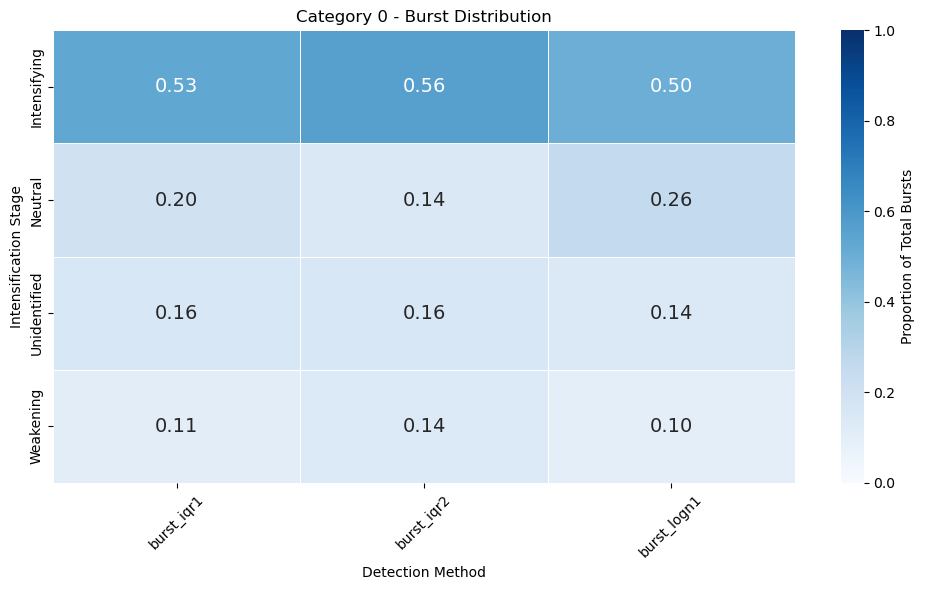

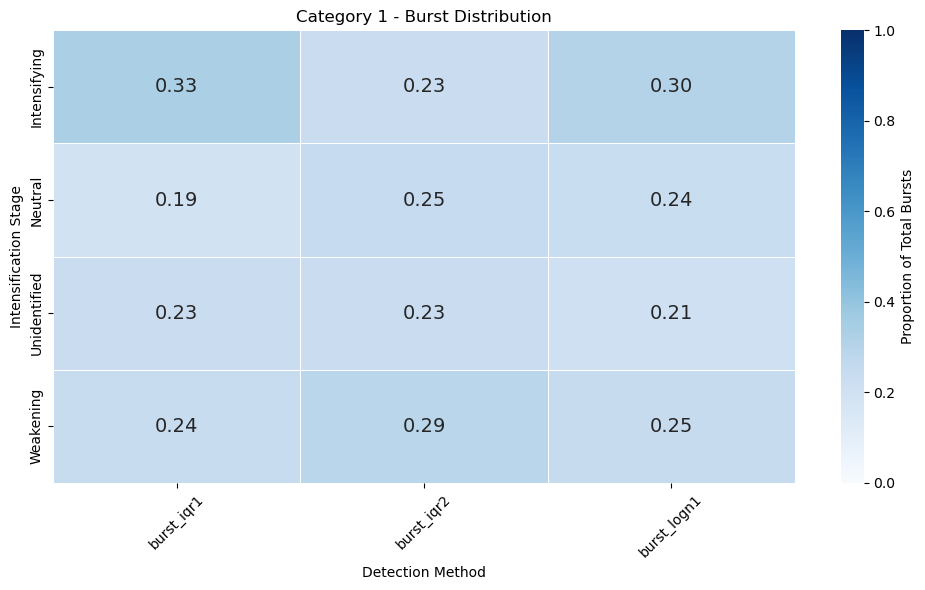

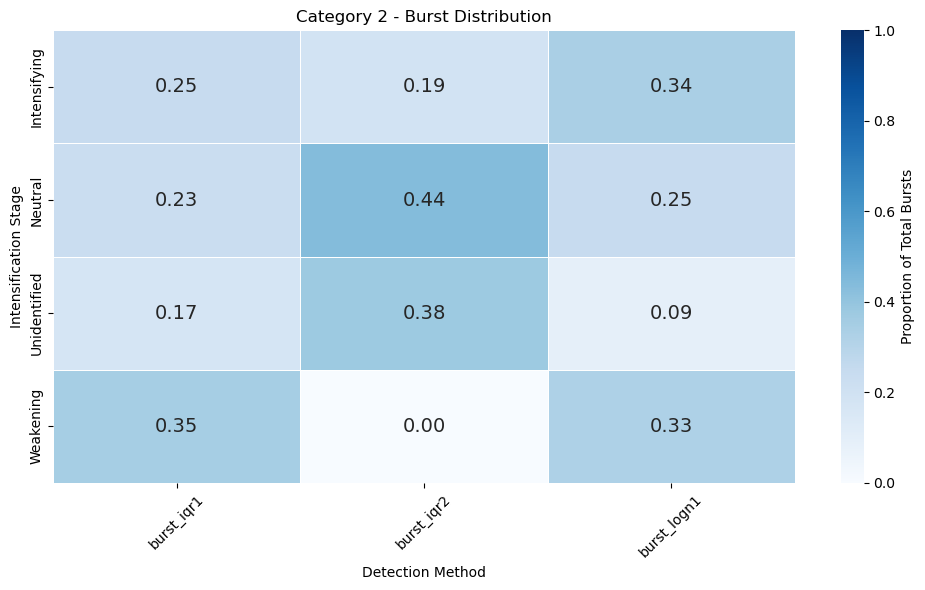

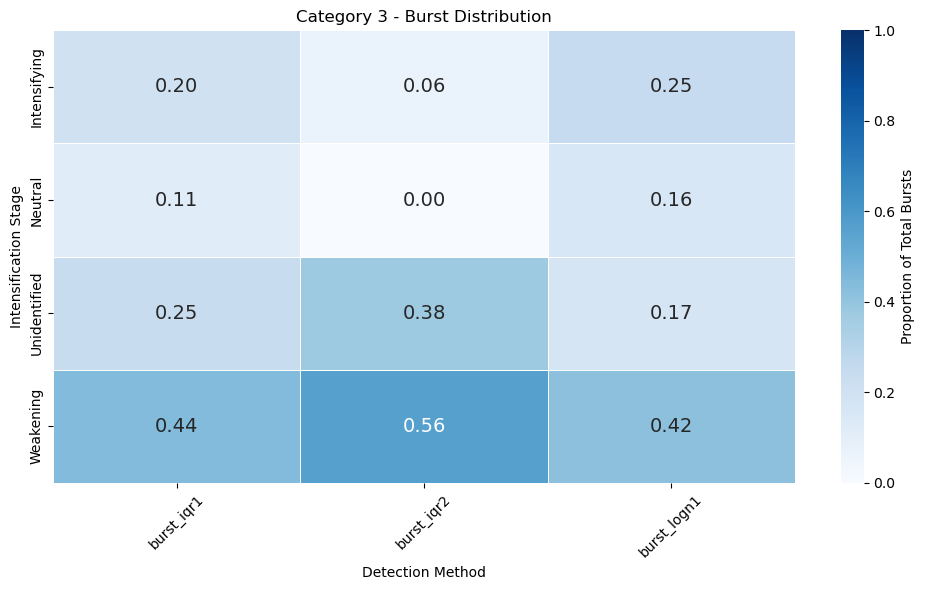

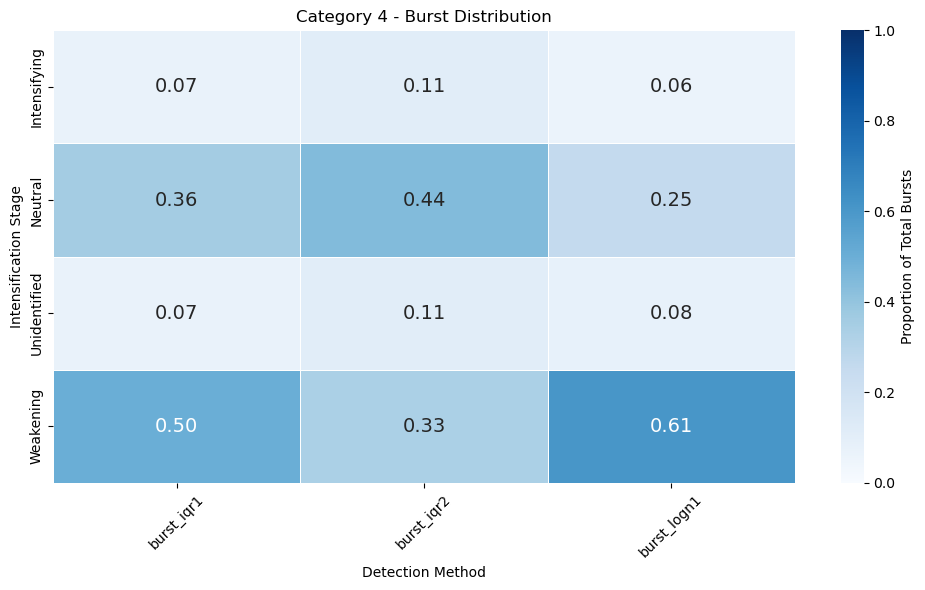

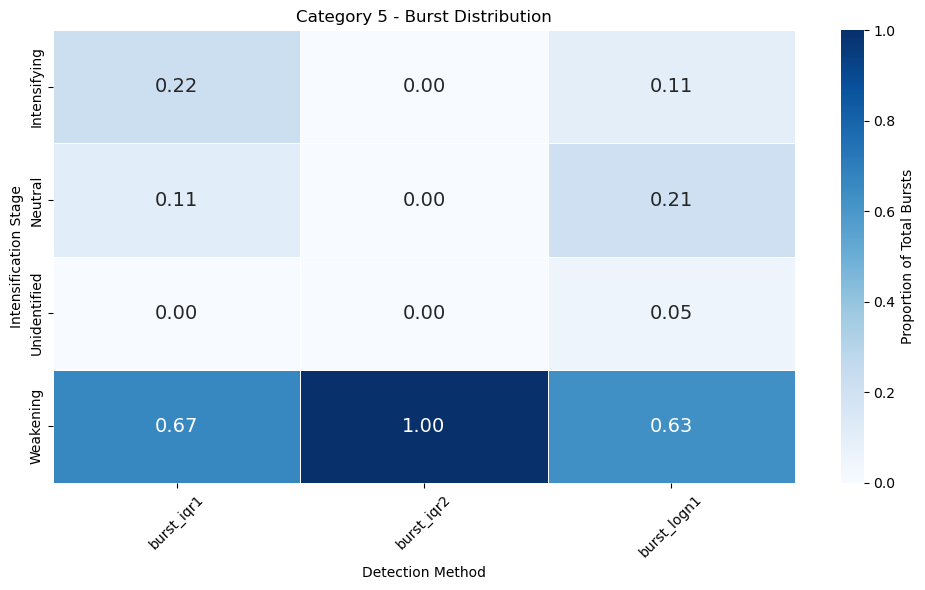

In [12]:
# Generate heatmaps for each category
create_category_heatmap(0)
create_category_heatmap(1)
create_category_heatmap(2)
create_category_heatmap(3)
create_category_heatmap(4)
create_category_heatmap(5)

Key Findings:

- Method Performance:
    - IQR1: Effective for categories 0,3,4,5, weakest in Category 1 (p=0.049).
    - IQR2: Only valid for categories 0 and 3, unreliable elsewhere.
    - LOGN1: Reliable in 5 of 6 categories (categories 0,2,3,4,5), strongest in Category 0 (p=3e-47).
- Category Trends:
    - Category 0: All methods show extreme significance (p < 1e-16).
    - Category 1: No method fully reliable (highest p=0.049).
    - Categories 3-5: Consistent results with LOGN1 (p ≤ 0.004).
- Heat Map Findings:
    - Category 0: more lightning bursts occur in Intensifying stage
    - Category 1-2: no significant difference
    - Category 3-5: more lightning bursts occur in Weakening stage

### Statistical Analysis - Grouped Category
Due to the lightning burst distribution difference in each category, this section will compare lightning bursts by intensity tier. We group the categories as follows:
- Categories 0-2: Developing/Moderate-intensity cyclones  
- Categories 3-5: Major hurricanes 

Let's start by creating the combined categories and performing the chi-squared test.

In [13]:
# Create Combined Categories
cat_bins = [-1, 2.5, 5]  # -1 to catch 0 values
cat_labels = ['Group 0-2', 'Group 3-5']
burst_data['Category_Group'] = pd.cut(burst_data['Current_Category'],
                                       bins=cat_bins,
                                       labels=cat_labels)

# Group Data by New Categories
methods = ['burst_iqr1', 'burst_iqr2', 'burst_logn1']
grouped_df = burst_data.groupby(["Category_Group", "Intensification_Category_3"])[methods].sum().reset_index()
cat_group_results = []

for cat in grouped_df["Category_Group"].unique():
    # Filter data for the current basin and set category as index
    cat_data = grouped_df[grouped_df["Category_Group"] == cat].set_index("Intensification_Category_3")

    # Run Chi-Square test for each method
    for method in methods:
        observed = cat_data[method].tolist()

        # Ensure there are observed values to avoid division by zero in chi-square
        if sum(observed) == 0:
            print(f"Skipping {method} for {cat} due to zero observations.")
            continue

        # Perform Chi-Square test
        chi2, p = stats.chisquare(observed)

        # Append results to the list
        cat_group_results.append({
            "Category": cat,
            "Method": method,
            "p-value": p
        })

results_df3 = pd.DataFrame(cat_group_results)
results_df3['Significant'] = results_df3['p-value'] <= 0.05
print(results_df3)

    Category       Method       p-value  Significant
0  Group 0-2   burst_iqr1  1.383576e-35         True
1  Group 0-2   burst_iqr2  1.554015e-10         True
2  Group 0-2  burst_logn1  1.049028e-38         True
3  Group 3-5   burst_iqr1  3.334363e-07         True
4  Group 3-5   burst_iqr2  1.399826e-02         True
5  Group 3-5  burst_logn1  4.616056e-12         True


/tmp/ipykernel_109869/2009132139.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = burst_data.groupby(["Category_Group", "Intensification_Category_3"])[methods].sum().reset_index()


Let's look at the burst distributions by the category groups for each threshold method. Start by creating the heapmap function.

In [14]:
# Heatmap Visualization for grouped category
def group_category_heatmap(grouped_category):
    # Filter data for specific category
    cat_data = grouped_df[grouped_df['Category_Group'] == grouped_category]

    # Melt the data to long format
    melted = cat_data.melt(
        id_vars=['Intensification_Category_3'],
        value_vars=methods,
        var_name='Method',
        value_name='Burst_Count'
    )

    # Pivot and normalize data
    pivot_table = melted.pivot_table(
        index='Intensification_Category_3',
        columns='Method',
        values='Burst_Count',
        aggfunc='sum'
    )

    # Normalize within each method
    df_normalized = pivot_table.apply(lambda x: x/x.sum(), axis=0)

    # Create heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        df_normalized,
        annot=True,
        fmt=".2f",
        cmap='Blues',
        linewidths=0.5,
        cbar_kws={'label': 'Proportion of Total Bursts'},
        vmin=0,
        vmax=1,
        annot_kws={"size": 14}
    )
    plt.title(f'Category {grouped_category} - Burst Distribution')
    plt.xlabel('Detection Method')
    plt.ylabel('Intensification Stage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

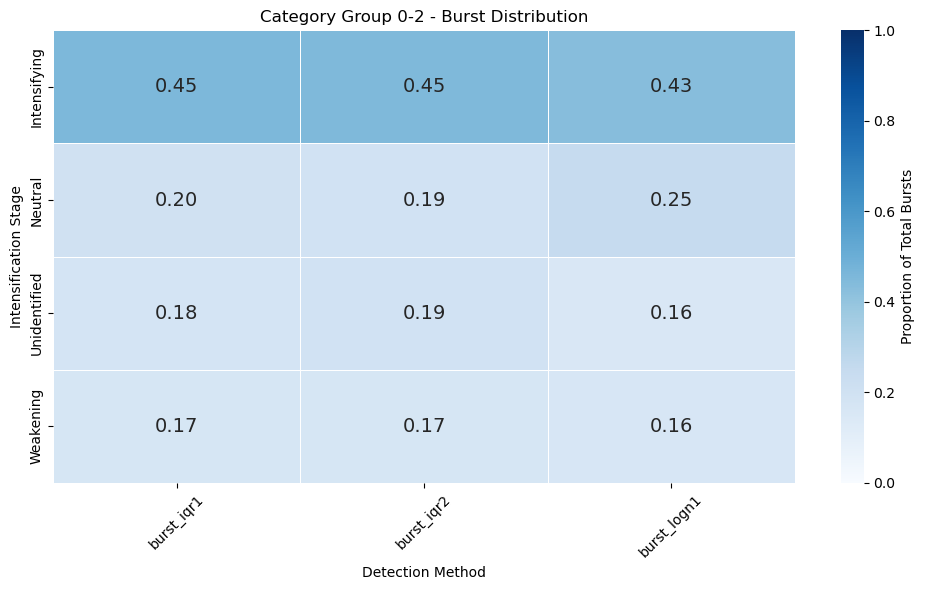

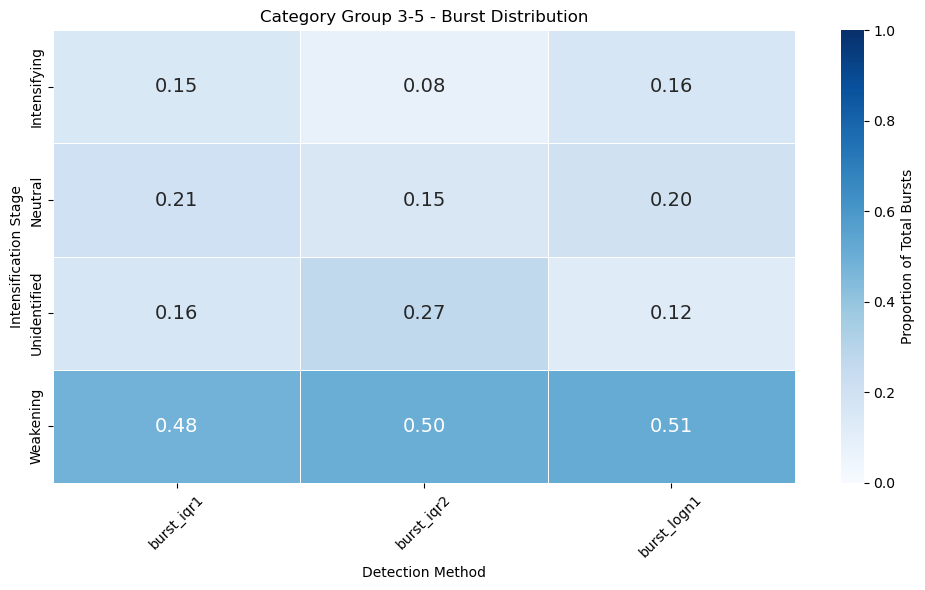

In [15]:
# Generate both heatmaps
group_category_heatmap("Group 0-2")
group_category_heatmap("Group 3-5")

Key Findings:

- All three detection methods show statistically significant differences (p < 0.05) in lightning burst patterns for both intensity groups
- LOGN1 method demonstrates exceptional sensitivity
- For Category 0-2 TCs, more bursts occur during the Intensifying stage, consistent with findings from all lightning data
- For Category 3-5 TCs, most bursts are detected during the Weakening stage